In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("ProjeData.csv")
df = df.drop(['Ad', 'Başrol', 'Senarist', 'Yayın tarihi', 'Yönetmen', 'Ülke'], axis=1)

In [28]:
label_encoder = LabelEncoder()
df['Durumu'] = label_encoder.fit_transform(df['Durumu'])
df['Format'] = label_encoder.fit_transform(df['Format'])
df['Kanal'] = label_encoder.fit_transform(df['Kanal'])
df['Tür'] = label_encoder.fit_transform(df['Tür'])
df['Yapım şirketi'] = label_encoder.fit_transform(df['Yapım şirketi'])
df['Yapımcı'] = label_encoder.fit_transform(df['Yapımcı'])

In [29]:
df['Sezon sayısı'] = df['Sezon sayısı'].apply(lambda x: int(str(x).split(' ')[0]) if pd.notna(x) and ' ' in str(x) else x)

In [30]:
df = df.dropna(subset=['Sezon sayısı'])

In [31]:
corr_matrix = df.corr()

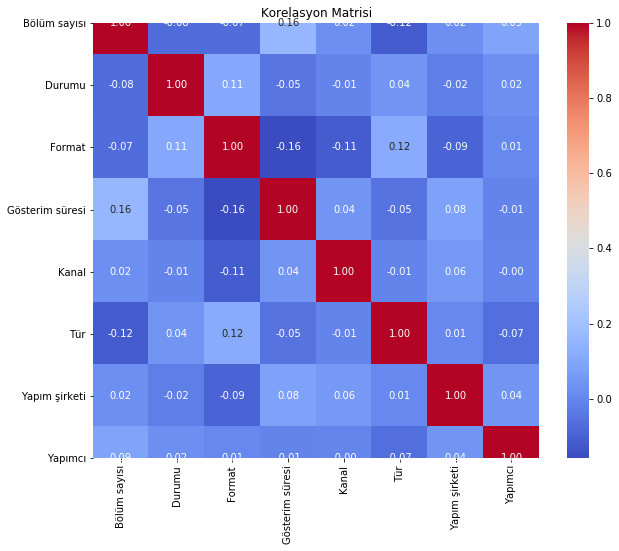

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [33]:
X = df.drop('Sezon sayısı', axis=1)
y = df['Sezon sayısı']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)



In [37]:
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.230769230769231
